# **Vectorization**

벡터 혹은 배열에 대한 연산을 각 원소에 대해 수행하는 것이 아니라, 한번에 명령으로 병렬적으로 동시에 계산하도록 하는 것을 의미

- 벡터화(Vectorization)는 코딩에서 명백한 for loop을 제거하는 방법.
- 딥러닝 알고리즘에서 대규모 데이터 세트를 활용하는 데, 코딩을 빨리 진행하는 것이 중요.
- 코딩 시간이 길어지면, 그에 맞춰 결괏값을 얻는데 오랜 시간이 걸리기 때문.

로지스틱 회귀 함수 z = wX + b에서, non-vectorized를 도입했다면, 아래처럼 코드를 작성할 수 있다.

In [ ]:
# Non-vectorized
# 로지스틱 회귀: z = wx + b

z = 0
for i in range(n-x):
	z += w[i] * x[i]
z += b

In [ ]:
# Vectorized
# 로지스틱 회귀: z = wx + b

# np.dot(w, x) = w transpose x
z = np.dot(w, x) + b

**vectorizaation vs non-vectorization (code)**

- vectorization과 non-vectorization을 아래 코드를 통해 실제 소요 시간을 살펴보면, vectorization 했을 때는 5.00ms가 소요된 것에 비해 non-vectorization의 for loop 코드는 1000ms로 약 200배 차이가 난 것을 볼 수 있다.
- cpu, gpu 성능에 따라 차이가 있겠지만, 여기서 중요한 점은 "for loop 구문을 사용하는 것을 피하는 것'입니다

In [ ]:
# vectorization
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a, b)
toc = time.time()
print(c)
print("vectorized version: " + str(1000*(toc-tic)) + "ms")

# non-vectization
c= 0
tic = time.time()
for i in range(1000000):
    c += a[i] * b[i]
toc = time.time()

print('-'*10)
print(c)
print("For loop: "+ str(1000*(toc-tic)) + "ms")

250083.6375868524
vectorized version: 5.094766616821289ms
----------
250083.63758684896
For loop: 995.6204891204834ms


# **Whenever possible, avoid explicit for-loops**

- 코드를 작성함에 있어서 되도록이면 for-loop 사용을 지양하고, 가능하면 내장된 함수를 사용하는 것이 중요
- 임의의 함수 u = Av에 대해서 계산을 하게되면, non-vectorized의 경우는 for-loop를 2번 사용하는 것에 비해, vectorized는 내장 함수 np.dot()을 활용해 1줄의 코드로 작성할 수 있다.

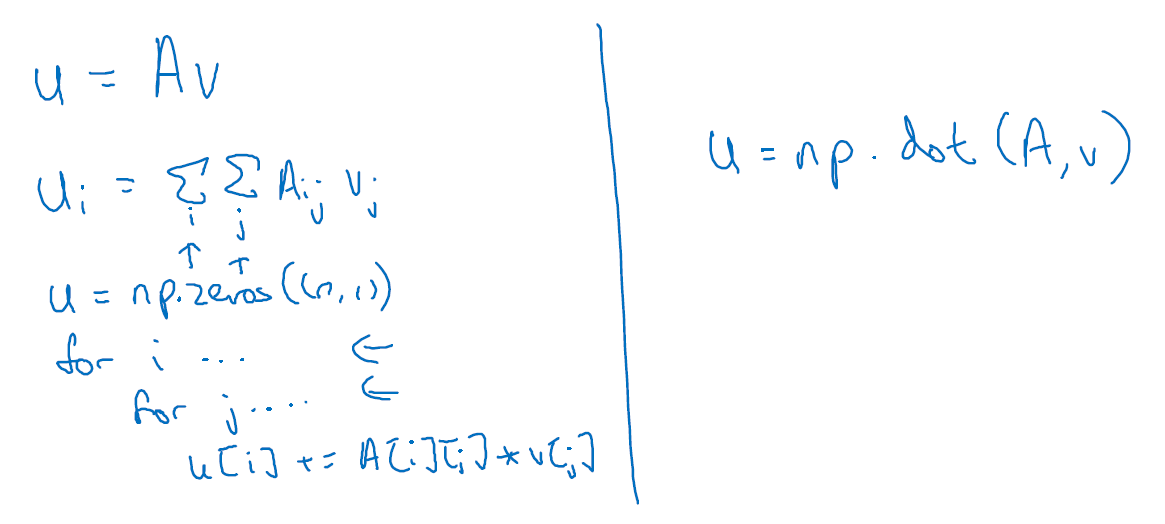

- 벡터를 인자로 받아 어떤 함수값 벡터를 계산하는 경우도 벡터화 할 경우 그 성능이 매우 향상.

- numpy의 벡터화된 함수로는 np.exp, np.abs, np.maximum 등이 있다.
- 피연산자가 numpy-array일 경우 기본적인 4칙연산도 벡터화되어 계산된다.

(아래 행렬 제곱에서의 성능 차이 예시)

In [ ]:
import numpy as np
import time

n = 1000
m = 2000
A = np.random.random((n, m))

u = np.zeros((n, m))

tic = time.time()
for i in range(n):
    for j in range(m):
        u[i][j] = A[i][j]**2
toc = time.time()
print('For loop version  : ', str(1000*(toc-tic)) + 'ms')

tic = time.time()
u = A**2
toc = time.time()
print('Vectorized version:', str(1000*(toc-tic)) + 'ms')

For loop version  :  1498.73685836792ms
Vectorized version: 5.750417709350586ms


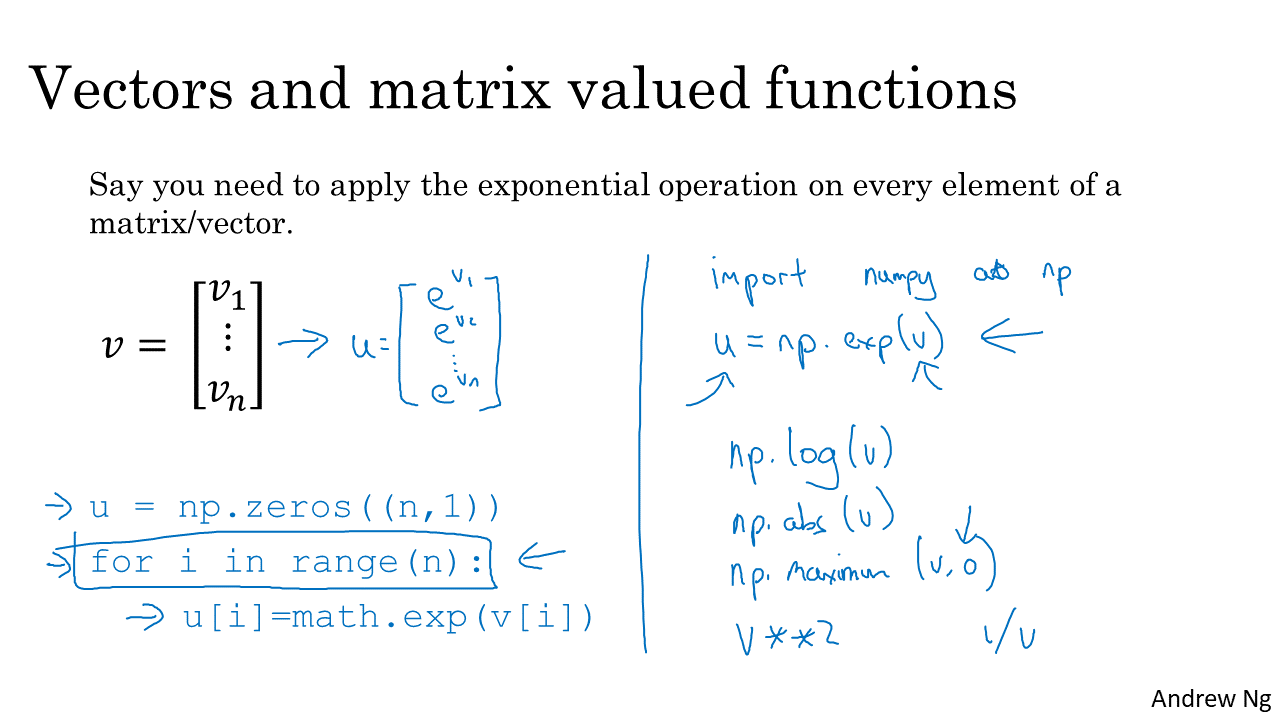

# **More Vectorization Examples**

In [ ]:
import numpy as np
import time

n = 2000
m = 3000
A = np.random.random((n, m))
v = np.random.random(m)

u = np.zeros((n,1))

tic = time.time()
for i in range(n):
    for j in range(m):
        u[i] += A[i][j] * v[j]
toc = time.time()
print('For loop version  : ', str(1000*(toc-tic)) + 'ms')

tic = time.time()
u = np.dot(A, v)
toc = time.time()
print('Vectorized version:', str(1000*(toc-tic)) + 'ms')


For loop version  :  22683.343648910522ms
Vectorized version: 4.713296890258789ms


In [ ]:
#m x n차원 행렬  A와 n x p차원 행렬 B의 곱은 아래와 같다.
import numpy as np
import time

n = 31
m = 71
p = 111

A = np.random.random((n, m))
B = np.random.random((m, p))

u = np.zeros((n,p))

tic = time.time()
for i in range(n):
    for e in range(p):
        for j in range(m):
            u[i][e] += A[i][j] * B[j][e]
toc = time.time()
print('For loop version  : ', str(1000*(toc-tic)) + 'ms')

tic = time.time()
u = np.dot(A, B)
toc = time.time()
print('Vectorized version:', str(1000*(toc-tic)) + 'ms')


For loop version  :  287.9776954650879ms
Vectorized version: 0.48732757568359375ms


**벡터화된 행렬 연산 몇가지(dot, outer, multiply)**

In [ ]:
import numpy as np
x = np.random.randn(7)
y = np.random.randn(7)

In [ ]:
np.dot(x, y)

-5.560355924639375

In [ ]:
np.outer(x, y)

array([[-1.33677581,  1.28630765, -1.21045894, -2.91034197, -1.12486185,
         0.63704606,  1.2191445 ],
       [ 1.30800152, -1.25861969,  1.18440363,  2.84769644,  1.10064904,
        -0.62333355, -1.19290224],
       [-0.75753873,  0.72893888, -0.6859561 , -1.64926439, -0.63744901,
         0.36100822,  0.69087813],
       [-0.72292263,  0.69562967, -0.65461101, -1.57390047, -0.60832047,
         0.34451178,  0.65930812],
       [-0.46053287,  0.44314608, -0.41701542, -1.00264243, -0.38752636,
         0.21946885,  0.42000769],
       [ 0.44004787, -0.42343446,  0.39846612,  0.95804381,  0.37028876,
        -0.20970664, -0.40132529],
       [ 0.11827897, -0.11381351,  0.10710235,  0.25750933,  0.09952866,
        -0.05636633, -0.10787086]])

In [ ]:
np.multiply(x, y)  # same as x*y

array([-1.33677581, -1.25861969, -0.6859561 , -1.57390047, -0.38752636,
       -0.20970664, -0.10787086])

# **Logistic regression derivatives**

- 파란색 글씨는 로지스틱 회귀에서 도함수를 구하는 공식.
- 파이썬의 내장 함수(np.zeros)를 활용해서 기존의 2개의 for-loop를 1개로 줄일 수 있다.

- 로지스틱 회귀모형의 비용함수(cost function, $J$)와 미분항($dw_1$, $dw_2$, $db$)을 구하는 구현은 아래와 같다. 각 데이터 샘플에 대해 for-loop를 돌게되는데, 우선 dw1과 dw2를 구하는 것을 벡터화 할 수 있다. 지금은 w가 단 두개이지만 여럿일 경우 벡터화 하는 것이 효과적.

- d$w_1$ += $x_1^{(i)}$d$z^{(i)}$, d$w_2$ += $x_2^{(i)}$d$z^{(i)}$를 d$w$ += $x^{(i)}$d$z^{(i)}$로 바꾸게 된다.

(아래 슬라이드에서 d$z^{(i)}$ = $a^{(i)} -y^{(i)}$가 d$z^{(i)}$ = $a^{(i)}(1-a^{(i)})$로 표기된 것은 오류로 보임)

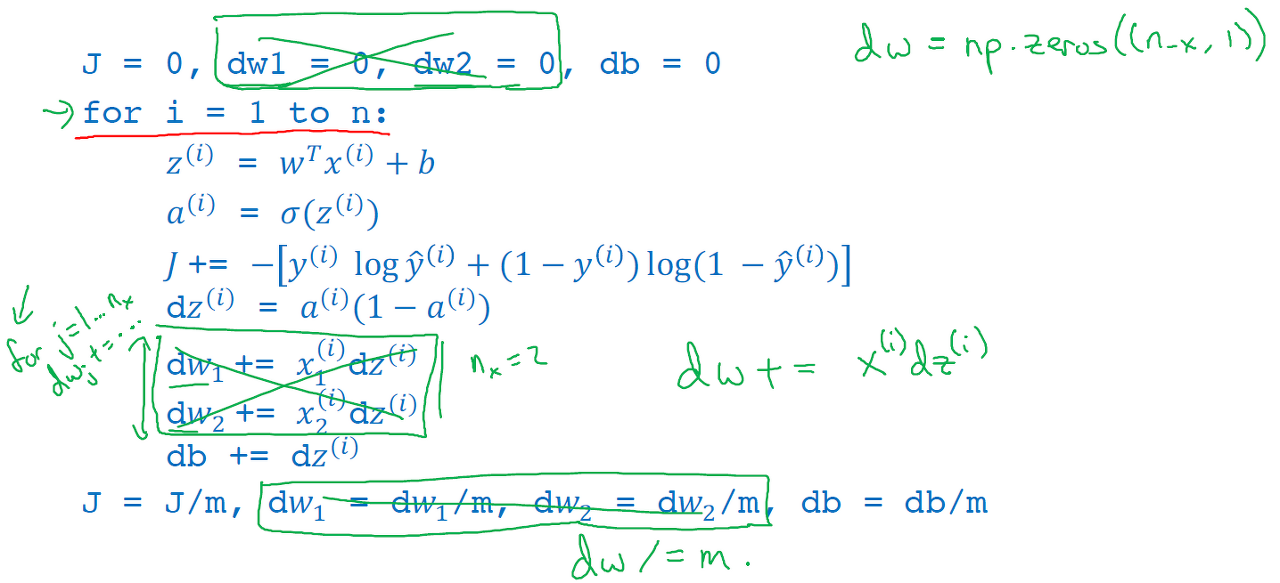

In [2]:
# Step1 : implementation with for-loop, 100 epoch

import pandas as pd
import numpy as np
import time

# etc
sigmoid = lambda x: 1 / (1 + np.exp(-x))


def get_log_losses(y_true, y_pred):
    return np.multiply(-y_true, np.log(y_pred)) - np.multiply(1 - y_true, np.log(1 - y_pred))


# data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) # iris data
df[4] = np.where(df[4] == 'Iris-setosa', 1, 0)
df_train = df.sample(frac=0.7, random_state=0)
df_test = df.sample(frac=0.3, random_state=0)

X_test = np.array(df_test[[0, 1]]).T
Y_test = np.array(df_test[[4]]).T
X_train = np.array(df_train[[0, 1]]).T
Y_train = np.array(df_train[[4]]).T

# model parameters
n_x = 2  # number of features
m = X_train.shape[1]  # number of samples
alpha = 0.01  # learning rate
num_epoch = 100

# weights
b = 0
w1 = 0
w2 = 0

w = np.zeros((n_x, 1))

tic = time.time()

# Training - looping for epoch and for all traning data
for _ in range(num_epoch):  # for each epoch

    # initializing gradients and cost
    J = 0
    dw1 = 0
    dw2 = 0
    db = 0

    for i in range(m):  # for each sample
        x_i_1 = X_train[0, i]  # 1st feature
        x_i_2 = X_train[1, i]  # 2nd feature

        y_i = float(Y_train[0, i])

        z_i = b + w1 * x_i_1 + w2 * x_i_2
        a_i = sigmoid(z_i)
        J += -(y_i * np.log(a_i) + (1 - y_i) * np.log(1 - a_i))

        dz_i = a_i - y_i

        dw1 += x_i_1 * dz_i
        dw2 += x_i_2 * dz_i
        db += dz_i

    J = J / m
    dw1 = dw1 / m
    dw2 = dw2 / m
    db = db / m

    w1 -= alpha * dw1
    w2 -= alpha * dw2
    b -= alpha * db

# Prediction for test set
y_pred = sigmoid(b + w1 * X_test[0, :].reshape(-1, 1) + w2 * X_test[1, :].reshape(-1, 1)).T

# Test set loss
losses = get_log_losses(Y_test, y_pred)

toc = time.time()
print('Average loss for the test set:{}'.format(np.average(losses)))
print('b:{}, w:{}'.format(b, [w1, w2]))
print('Execution time for the loop version  : ', str(1000 * (toc - tic)) + 'ms')

Average loss for the test set:0.5882050769314021
b:0.004373669091718309, w:[-0.2236471632143403, 0.1304488882856519]
Execution time for the loop version  :  129.99939918518066ms


In [3]:
# Step2 : vectorized dw and xi

import pandas as pd
import numpy as np
import time

# etc
sigmoid = lambda x: 1 / (1 + np.exp(-x))


def get_log_losses(y_true, y_pred):
    return np.multiply(-y_true, np.log(y_pred)) - np.multiply(1 - y_true, np.log(1 - y_pred))


# data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df[4] = np.where(df[4] == 'Iris-setosa', 1, 0)
df_train = df.sample(frac=0.7, random_state=0)
df_test = df.sample(frac=0.3, random_state=0)

X_test = np.array(df_test[[0, 1]]).T
Y_test = np.array(df_test[[4]]).T
X_train = np.array(df_train[[0, 1]]).T
Y_train = np.array(df_train[[4]]).T

# model parameters
n_x = X_train.shape[0]  # number of features
m = X_train.shape[1]  # number of samples
alpha = 0.01  # learning rate
num_epoch = 100

# weights
b = np.zeros((1, 1))
w = np.zeros((n_x, 1))  # column vector

tic = time.time()

# Training - looping for epoch and for all traning data
for _ in range(num_epoch):  # for each epoch

    # initializing gradients and cost
    J = 0;
    dw = np.zeros((n_x, 1))
    db = np.zeros((1, 1))

    for i in range(m):  # for each sample
        x_i = X_train[:, i].reshape(-1, 1)  # column vector
        y_i = Y_train[0, i].reshape(-1, 1)

        z_i = b + np.dot(w.T, x_i)
        a_i = sigmoid(z_i)
        J += -(y_i * np.log(a_i) + (1 - y_i) * np.log(1 - a_i))

        dz_i = a_i - y_i

        dw += np.dot(x_i, dz_i)
        db += dz_i

    J = J / m
    dw = dw / m
    db = db / m

    w -= alpha * dw
    b -= alpha * db

# Prediction
y_pred = sigmoid(b + np.dot(w.T, X_test))

# Accuracy
losses = get_log_losses(Y_test, y_pred)

toc = time.time()
print('Average loss for the test set:{}'.format(np.average(losses)))
print('b:{}, w:{}'.format(b.ravel(), list(w.ravel())))
print('Execution time for the vectorized version  : ', str(1000 * (toc - tic)) + 'ms')

Average loss for the test set:0.588205076931402
b:[0.00437367], w:[-0.2236471632143403, 0.13044888828565188]
Execution time for the vectorized version  :  306.31256103515625ms


- 슬라이드 내용을 예시 데이터로 구현해보면 아래와 같고, 두번째 코드와 같이 벡터화 할 수 있다.
- $w$가 2개 뿐이라서 벡터화 했을 때 실행시간 은 오히려 증가.

# **Logistic Regression Vectorization**

- 벡터화(Vectorization)는 행렬을 세로 벡터로 바꾸는 선형변환.
- 앞서 구현에서 d$w$ 계산을 벡터화 하기는 했으나 $m$개 샘플에 대한 for-loop가 수행.
 - 이 또한 벡터화 할수 있다.
 - 벡터화의 장점은 for-loop 등의 방법을 통해 동일한 결과를 내는 알고리즘을 파이썬에 내장된 함수를 통해 빠르고, 가벼운 효율적인 알고리즘을 구성할 수 있는 점.


- for-loop를 돌게 되면 $m$개의 $z^{(i)}$, $a^{(i)}$를 구하게 되는데 이를 벡터화 하여 $Z = \left[ z^{(1)}, z^{(2)}, \cdots, z^{(m)} \right] = w^TX + b = \left[ w^Tx^{(1)}+b, w^Tx^{(2)}+b, \cdots, w^Tx^{(m)}+b \right]$와 같이 구현할 수 있다.
- 각 샘플에 대한 예측값 벡터는 $A = \left[ a^{(1)}, a^{(2)}, \cdots, a^{(m)} \right]=\sigma(Z)$=np.exp($Z$)와 같이 구현할 수 있다.

- 여기에서 $w^TX + b$를 보면 $w \in \mathbb{R}^{n_x \times 1}$, $X \in \mathbb{R}^{n_x \times m}$이라서 '1xm차원 벡터($w^TX \in \mathbb{R}^{1 \times m}$)와 실수($b \in \mathbb{R}$)의 합'이라는 뭔가 부자연스러운 연산이 포함.
- '+' 연산의 첫번째 피연산자가 numpy-array라서 두번째 피연산자인 $b$는 1xm차원 벡터 $[b, b, \cdots, b]$로 확장된다. 이런 것을 Broadcasting이라 함.

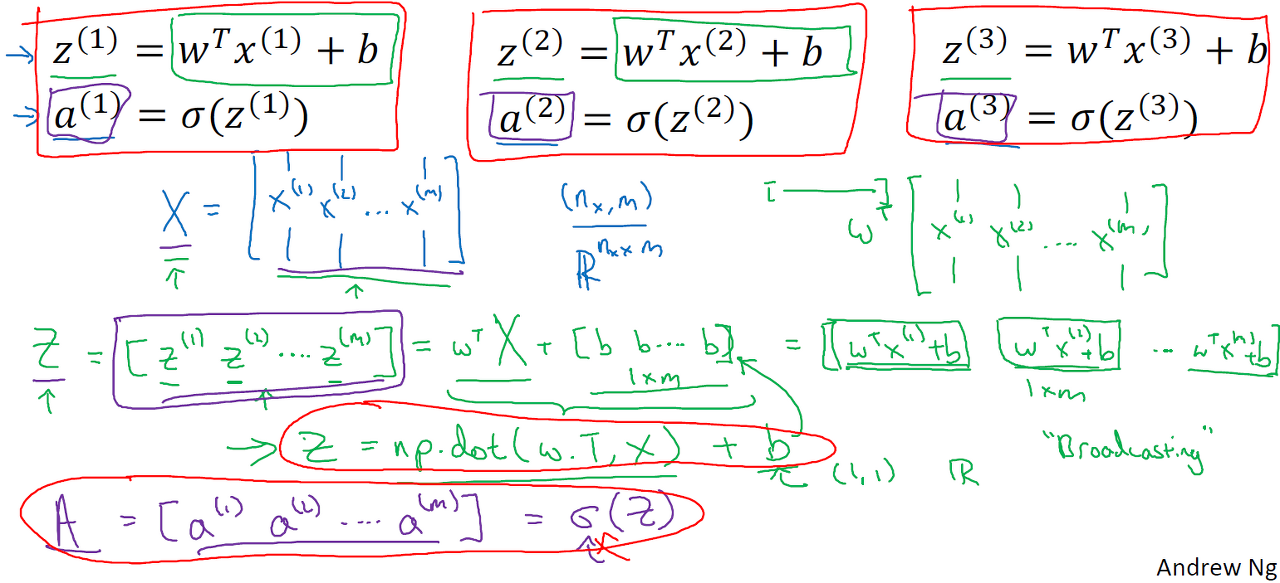

# **Vectorizing Logistic Regression's Gradient Computation**

- 앞서 각 샘플 데이터에 대한 예측값 계산을 벡터화하여 벡터 $A$를 구할 수 있었다.
- dz, db, dw에 대한 연산도 아래와 같이 벡터화 할 수 있다.

- m×n행렬 A의 선형화는 vec(A)로 표기하며, 행렬 A의 열을 다음 열 위에 쌓아가며 얻을 수 있다.

- 변수 x1, x2, ... xn에 대한 각각의 예측값(a)에 대해서 개별적으로 for-loop를 사용하지 않고, [1 x m] 차원으로 1줄로 행렬을 정리할 수 있다.



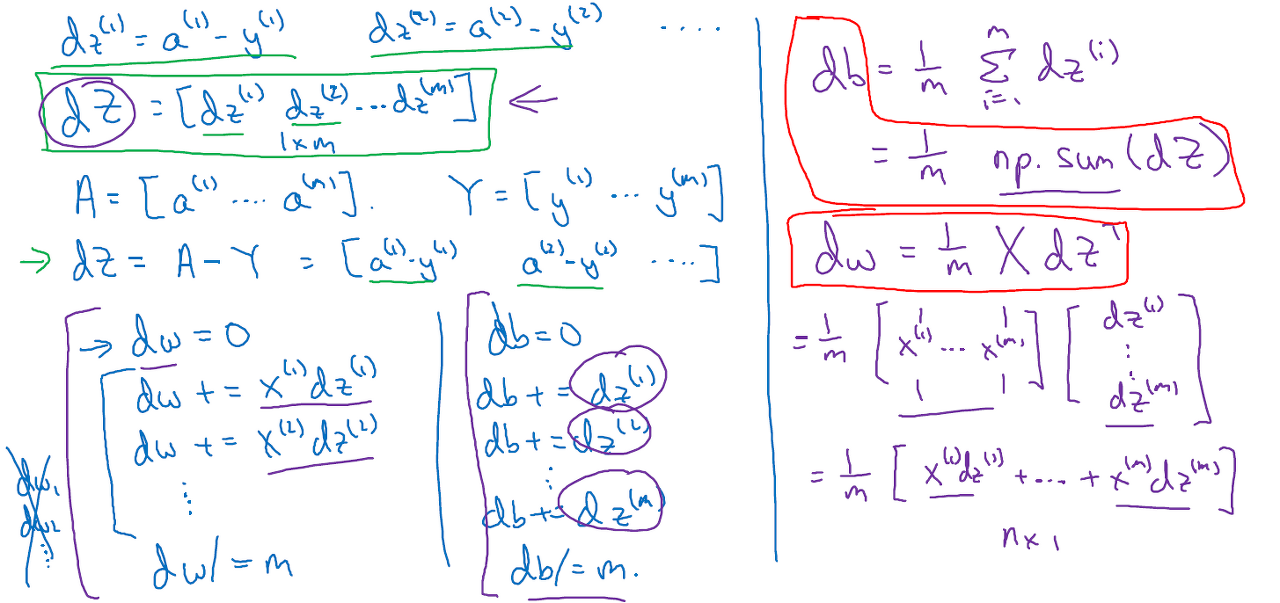

In [4]:
# Step3 : fully vectorized

import pandas as pd
import numpy as np
import time

# etc
sigmoid = lambda x: 1 / (1 + np.exp(-x))
def get_log_losses(y_true, y_pred):
    return np.multiply(-y_true, np.log(y_pred)) - np.multiply(1-y_true, np.log(1-y_pred))

# data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df[4] = np.where(df[4] == 'Iris-setosa', 1, 0)
df_train = df.sample(frac=0.7, random_state=0)
df_test = df.sample(frac=0.3, random_state=0)

X_test = np.array(df_test[[0, 1]]).T
Y_test = np.array(df_test[[4]]).T
X_train = np.array(df_train[[0, 1]]).T
Y_train = np.array(df_train[[4]]).T

# model parameters
n_x = X_train.shape[0]  # number of features
m = X_train.shape[1]  # number of samples
alpha = 0.01  # learning rate
num_epoch = 100

# weights
b = np.zeros((1, 1))
w = np.zeros((n_x, 1))  # column vector

tic = time.time()

# Training - looping for epoch and for all traning data
for _ in range(num_epoch):  # for each epoch

    # initializing gradients and cost
    J = 0;
    dw = np.zeros((n_x, 1))
    db = np.zeros((1, 1))

    Z = np.dot(w.T, X_train) + b
    A = sigmoid(Z)
    J = -(Y_train * np.log(A) + (1 - Y_train) * np.log(1-A))
    dz = A - Y_train
    db = np.sum(dz) / m
    dw = np.dot(X_train, dz.T) / m  # equivalent implementations in 2 lines below
    # dw = np.sum(np.multiply(X_train, dz), axis=1) / m
    # dw = np.average(np.multiply(X_train, dz), axis=1)

    w -= alpha * dw
    b -= alpha * db

# Prediction
y_pred = sigmoid(b + np.dot(w.T, X_test))

# Accuracy
losses = get_log_losses(Y_test, y_pred)

toc = time.time()
print('Average loss for the test set:{}'.format(np.average(losses)))
print('b:{}, w:{}'.format(b.ravel(), list(w.ravel())))
print('Execution time for fully vectorized version  : ', str(1000 * (toc - tic)) + 'ms')

Average loss for the test set:0.5882050769314019
b:[0.00437367], w:[-0.22364716321434033, 0.1304488882856519]
Execution time for fully vectorized version  :  9.77635383605957ms


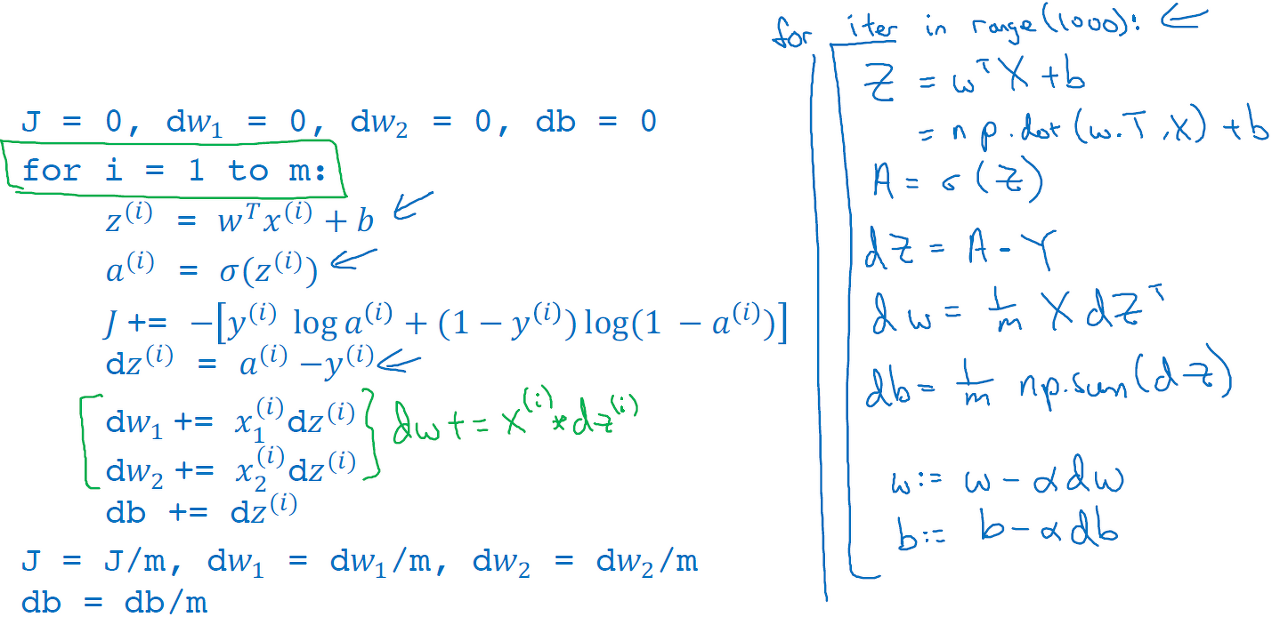

아래와 같이 scikit-learn의 LogisticRegression를 이용해서 모형변수를 구해볼 수도 있다.   
(앞서 구현과 비교해 scikit-learn를 이용한 구현 평균 log-loss가 현저하게 낮은데, 구현도 epoch를 늘려주면 다소 괜찮은 loss를 얻게 된다.)

- reshape(1, -1) 은 행렬을 행-벡터로 변환
- reshape(-1, 1) 은 행렬을 열-벡터로 변환
- ravel()은 행렬을 rank1 배열로 변환

In [ ]:
from sklearn import linear_model
from sklearn import metrics

logreg = linear_model.LogisticRegression(penalty='l2', C=100)
logreg.fit(X_train.T, Y_train.ravel())
y_pred = logreg.predict_proba(X_test.T)[:, 1].reshape(1, -1)  # same as below line of code
# y_pred = sigmoid(logreg.intercept_.reshape(-1, 1) + np.dot(logreg.coef_.reshape(-1, 1).T, X_test))

avg_loss = metrics.log_loss(Y_test.ravel(), y_pred.ravel())  # same as below line of code
# avg_loss = np.average(np.multiply(-Y_test, np.log(y_pred)) - np.multiply(1-Y_test, np.log(1-y_pred)))

print('Average loss for the test set:{}'.format(avg_loss))
print('b:{}, w:{}'.format(logreg.intercept_[0], list(logreg.coef_.ravel())))

# **Broadcasting in Python**

**Broadcasting**

- 파이썬 Numpy 라이브러리의 브로드캐스팅은 특정 조건을 만족면 모양이 다른 배열끼리의 연산도 가능하게 해 주며, 모양이 부족한 부분은 확장하여 연산을 수행할 수 있도록 하는 것을 의미.
- 확장 또는 전파한다는 의미로 Broadcasting을 설명하는 가장 간단한 예시는 배열과 스칼라를 계산.

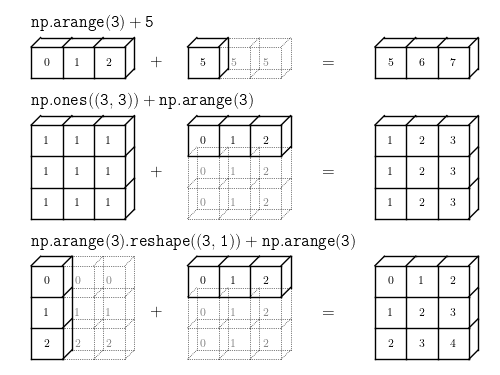

- 파이썬에서 broadcasting 동작 예시.
 - 아래 예시 데이터는 몇가지 식재료 100g에 들어있는 탄수화물(Carb), 단백질(Protein), 지방(Fat)이 몇 g 들어있는지를 나타낸다.
 - 예를들어 사과 100g에는 탄수화물이 56g, 단백질이 1.2g, 지방이 1.8g 들어 있다.

각 식재료 100g에 탄수화물, 단백질, 지방이 각각 몇 %식 들어있는지 계산하려면?

In [ ]:
import numpy as np
A = np.array([[56.0, 0.0, 4.4, 68.0],
             [1.2, 104.0, 52.0, 8.0],
             [1.8, 135.0, 99.0, 0.9]])

print(A)

[[ 56.    0.    4.4  68. ]
 [  1.2 104.   52.    8. ]
 [  1.8 135.   99.    0.9]]


아래 코드에서 axis=0은 위에서 아래로, axis=1은 좌에서 우로 연산하는 것을 의미

In [ ]:
cal = A.sum(axis=0)
print(cal)

[ 59.  239.  155.4  76.9]


In [ ]:
percentage = 100 * A / cal.reshape(1,4)
percentage

array([[94.91525424,  0.        ,  2.83140283, 88.42652796],
       [ 2.03389831, 43.51464435, 33.46203346, 10.40312094],
       [ 3.05084746, 56.48535565, 63.70656371,  1.17035111]])

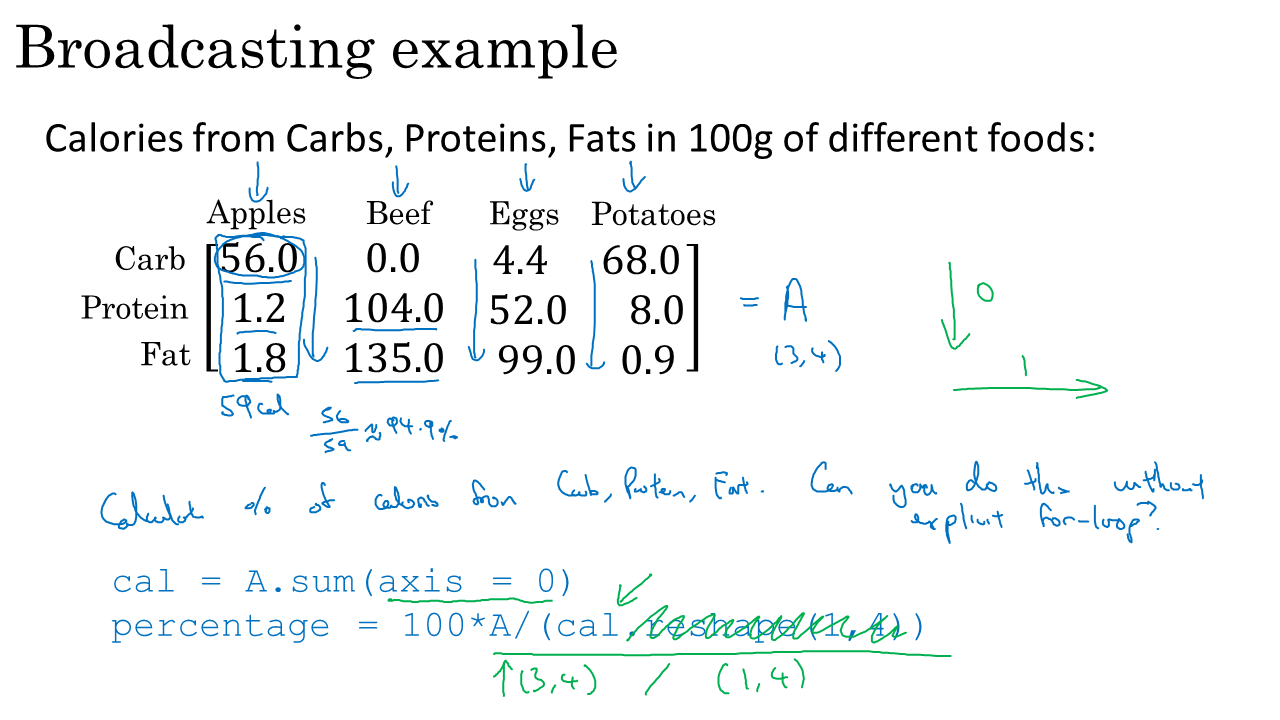

- '100 * A'에서 100은 자동으로 행렬 A와 같은 차원으로 확장(broadcast)된다. 마찬가지로 2x3 행렬과 1x3행렬을 더하는 경우 1x3 행렬이 2x3 행렬로 확장

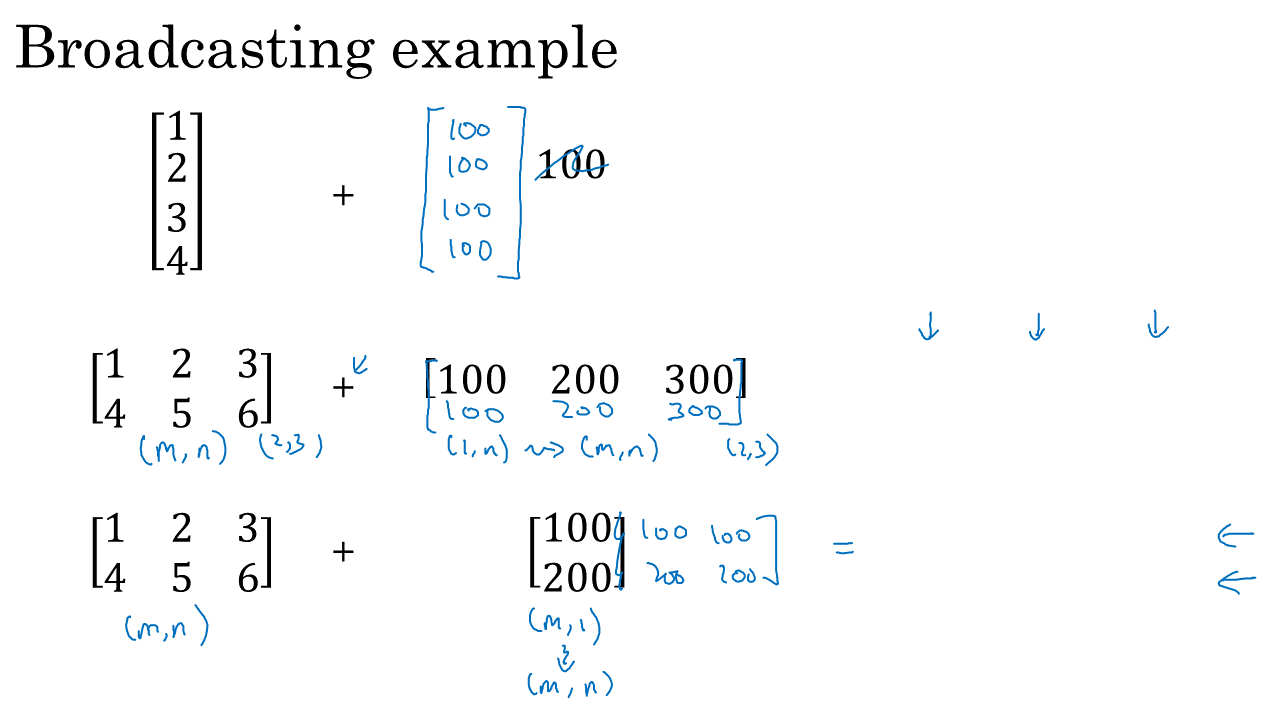

- broadcasting이 어떻게 동작하는지 살펴보면, m x n 행렬에 대한 사칙연산으로 두번째 피 연산자가 1 x n 행렬이면 m x n 행렬로 확장되고, m x 1 행렬이면 m x n 행렬로 확장된다.

(Matlab이나 Octave로 신경망을 프로그래밍 할 경우 bsxfun이란 것을 사용하는데 여기서도 비슷하게 broadcasting이 동작한다.)

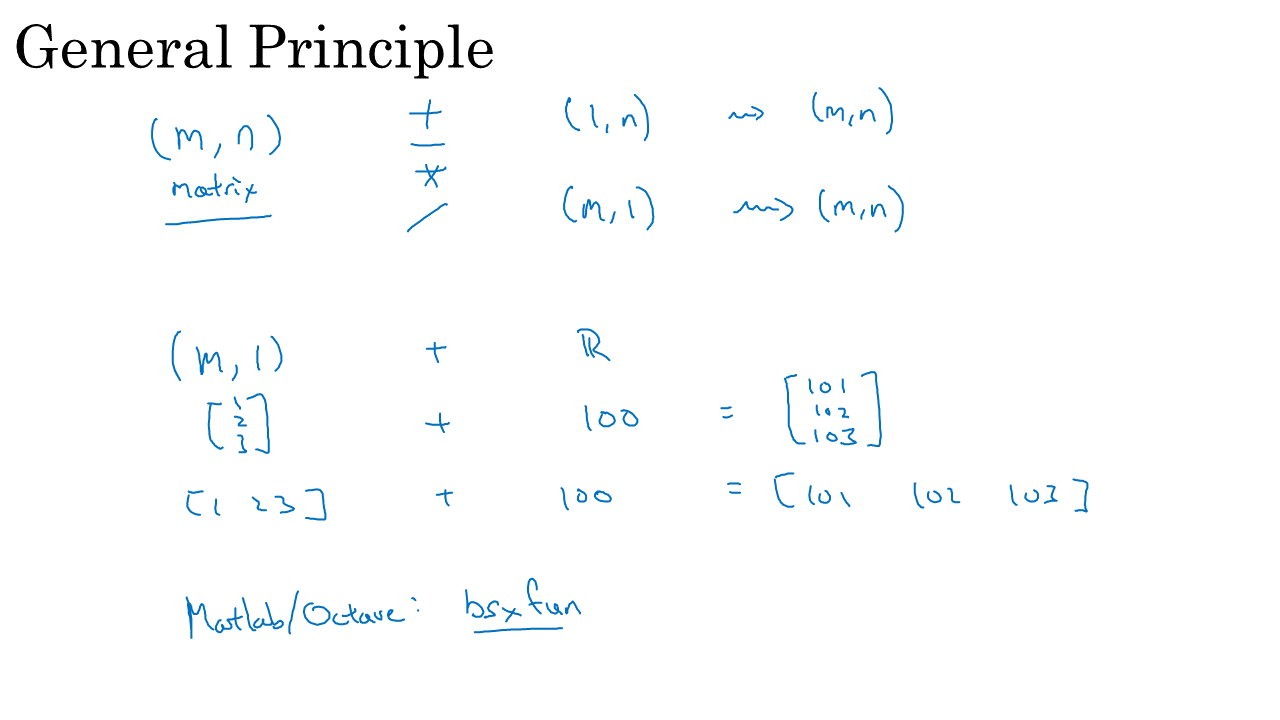


브로드캐스팅을 달성하기 위한 조건.

**차원의 크기가 1일때 가능.**
 - 두 배열 간의 연산에서 최소한 하나의 배열의 차원이 1이라면(0번 축이든 1번 축이든; 1행이든 1열이든) 가능.



**차원의 짝이 맞을 때 가능.**
 - 차원에 대해 축의 길이가 동일하면 브로드캐스팅이 가능.

**Numpy vectors Tips**

파이썬/넘파이에서 broadcasting과 같이 암묵적으로 동작하는 기능들이 아래와 같이 편리할 때도 있지만,

In [ ]:
k = np.array([1, 2, 3])
k + 100

아래 예와 같이 의도하지 않은 결과를 줄때도 있다. ((1,3)이나 (3,1)벡터 결과를 의도한 경우)

In [ ]:
x = np.array([1, 2, 3]).reshape((3,1))
y = np.array([4, 5, 6]).reshape((1,3))
z = x + y
z

 암묵적 동작 때문에 정말 찾기 어려운 버그가 발생하기도 하는데, 이런 문제들을 피하기 위한 팁 몇가지를 알아보기로 한다.
 - 우선 정규분포에서 임의의 숫자 5개를 생성한다.

In [ ]:
import numpy as np

a = np.random.randn(5)
print(a)

- 변수 a의 shape은 (5,)로서 이건 열벡터도, 행벡터도 아닌 랭크1-배열(rank1 array)이라는 것.

In [ ]:
print(a.shape)  # This is rank-1 array, neither row vector or column vector

- 문제는 a를 열벡터 혹은 행벡터로 생각하고 전치(transpose)를 하더라도 그 shape이 바뀌지 않는다.

In [ ]:
print(a.T)

- a와 a를 전치한 것을 dot-product할 경우, a가 벡터라면 어떤 행렬이 나오겠지만 a가 '랭크1-배열'이므로 실수(real number)가 결과 값이 된다.

In [ ]:
# Rank1-array Times Rank1-array transposed
print(np.dot(a, a.T))

# Vector Times Vector transposed
b = np.array([[1], [2], [3]])
print(np.dot(b, b.T))

- 문제를 피하기 위해서 신경망을 코딩할 때에는 shape이 (?, )혹은 (, ?)와 같은 **'랭크1-배열' 사용을 피하라**는 것.
- 대신 어떤 행렬을 생성할 때에는 명시적으로 shape을 지정하는 것이 실수를 줄이는 길이다.

In [ ]:
c = np.random.randn(5, 1)
print('c:', c, '\n')
print("c's shape:", c.shape, '\n')
print('c transposed:', c.T)

- 위의 열벡터 c에서 확인 할수 있는 것과 같이 꺽음괄호([, ])가 2중으로 데이터를 감싸고 있음을 확인 할 수 있다.

(랭크1-행렬의 경우 꺽음괄호가 한번 감싸고 있다.)

요약  

- 아래와 같은 변수 생성을 지양
```Python
a = np.random.randn(5)
```

- 열벡터를 생성할 때에는 아래와 같은 방식을 사용
```Python
a = np.random.randn(5, 1)
```

- 행벡터를 생성할 때에는 아래와 같은 방식을 사용
```Python
a = np.random.randn(1, 5)
```

- 혹은 변수 생성후 shape 변경(reshape은 CPU 비용이 저렴함)
```Python
a = np.random.randn(5).reshape((1, 5))
```

- assertion을 삽입하여 에러를 감지
```Python
assert(a.shape == (5,1))
```

- assertion을 넣으면 아래와 같이 조건(shape == (5,1))에 맞지 않는 경우 알려준다.

In [ ]:
a = np.random.randn(5)
assert(a.shape == (5,1))

- numpy행렬간 연산에서 기본적인 사칙연산(+, -, *, /)은 같은 위치의 원소간(element-wise) 연산이 이뤄지며, (shape의 값이 하나만 다른 경우) broadcast가 일어난다.

- 아래 예와 같이 '*'와 np.dot의 결과는 전혀 다르다.

In [5]:
a = np.random.randn(2, 3, 4)
b = np.random.randn(1, 3, 4)
a * b

array([[[-0.23231788,  0.56407575, -0.56827616, -0.93837593],
        [-0.26217201, -0.43450497,  0.55848878, -0.17183639],
        [-0.17770628, -6.28716269, -0.43955726, -0.57977516]],

       [[ 0.25609721, -0.65731311, -0.06840196, -0.05404594],
        [-1.2357149 , -0.02295885,  2.15999413, -0.35981801],
        [-1.07097541,  0.70301612, -0.59838462, -0.32222051]]])

In [6]:
a = np.random.randn(2, 3)
b = np.random.randn(3, 2)
a * b

ValueError: ignored

In [7]:
a = np.random.randn(2, 3)
b = np.random.randn(3, 2)
np.dot(a, b)

array([[ 3.47824659,  1.445478  ],
       [-2.71696141, -0.00572227]])

- 1차원 array를 만들게 되면, array를 전치(transpose) 해도 동일한 값을 가지게 되어, 벡터 간의 계산에 있어서 계산 실수, 오류가 발생.
- 방지하기 위해 1차원 array(rank 1 array) 대신에 1차원 벡터(rank 1 vector)를 만드는 게 오류를 줄이는 데 도움이 됨.

In [ ]:
import numpy as np
# 1차원 array
a = np.random.randn(5)

print("차원 크기: ", np.shape(a))
print("원본: ", a)
print("Transpose: ", a.T)
print("행열 곱: ", np.dot(a, a.T))

print('------------'*5)
print('------------'*5)

# 1차원 벡터
b = np.random.randn(5, 1)

print("차원 크기: ", np.shape(b))
print("원본: ", b)
print("Transpose: ", b.T)
print("행열 곱: ", np.dot(b, b.T))

차원 크기:  (5,)
원본:  [ 1.11832168  0.63689321  1.3297173  -0.78582558  1.18110383]
Transpose:  [ 1.11832168  0.63689321  1.3297173  -0.78582558  1.18110383]
행열 곱:  5.436952563307573
------------------------------------------------------------
------------------------------------------------------------
차원 크기:  (5, 1)
원본:  [[0.95629072]
 [0.40151355]
 [0.86562826]
 [2.75507817]
 [0.06676952]]
Transpose:  [[0.95629072 0.40151355 0.86562826 2.75507817 0.06676952]]
행열 곱:  [[9.14491950e-01 3.83963686e-01 8.27792271e-01 2.63465570e+00
  6.38510761e-02]
 [3.83963686e-01 1.61213133e-01 3.47561476e-01 1.10620122e+00
  2.68088686e-02]
 [8.27792271e-01 3.47561476e-01 7.49312276e-01 2.38487351e+00
  5.77975862e-02]
 [2.63465570e+00 1.10620122e+00 2.38487351e+00 7.59045571e+00
  1.83955257e-01]
 [6.38510761e-02 2.68088686e-02 5.77975862e-02 1.83955257e-01
  4.45816928e-03]]


만약에 1차원 array를 만들었다고 하더라도, reshape 함수를 통해 1차원 벡터로 수정할 수 있다.


In [ ]:
# 1차원 array
c = np.random.randn(5)
print("1차원 array: ", np.shape(c))

# 1차원 배열로 수정
c = a.reshape(5,1)
print("1차원 배열: ", np.shape(c))


1차원 array:  (5,)
1차원 배열:  (5, 1)


# **Explanation of logistic regression cost function (optional)**

일반적인 회귀모형에서는 예측값과 실제값의 차이에 대한 제곱합을 비용함수로 사용하는데($J(b, w) = - \frac{1}{m} \sum_i^m (y^{(i)} - \hat{y}^{(i)})^2$), 앞서 설명한 로지스틱 회귀모형에서는 다른 형태의 비용함수($J(w, b) = - \frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log \hat{y}^{(i)} + (1-y^{(i)}) \log(1-\hat{y}^{(i)})\right]$)를 사용.

- 로지스틱 회귀모형에 의하면 어떤 데이터 1건 $\mathbf{x}$가 가 주어졌을 때, 실제값이 1일 확률은 $p(y=1|\mathbf{x}) = \hat{y}$이고, 실제값이 0일 확률은 $p(y=0|\mathbf{x}) = 1- \hat{y}$이다.
0 이 두 표현을 결합하여 실제값이 1이든지 0이든지 그것을 맞출 확률은 $p(y|\mathbf{x}) = \hat{y}^y (1-\hat{y})^{1-y}$이다.
- 전체 $m$건의 데이터가 주어졌을 때 전체 데이터의 실제값을 맞출 확률은 각 건을 맞출 확률을 모두 곱한(결합확률, iid를 가정함) $\prod_i^m p(y^{(i)}|\mathbf{x}^{(i)})^{(i)}$이 된다.

 (이것을 우도(likelihood) 라 한다.)

- $\prod_i^m p(y^{(i)}|\mathbf{x}^{(i)})^{(i)}$값이 크다면 좋은 모형이라 할 수 있고,  이 값이 가장 커지도록 하는 적절한 $(b, \mathbf{w})$를 찾는 것이 모형 학습 과정이라 할 수 있다.

 (물론 과적합을 피하기도 해야 한다.)

- log 함수의 단조증가 특성 때문에 $\prod_i^m p(y^{(i)}|\mathbf{x}^{(i)})^{(i)}$를 최대화 하는 $(b, \mathbf{w})$과
log를 취하고 $m$으로 나눈 $\frac{1}{m}\sum_i^m \log p(y^{(i)}|\mathbf{x}^{(i)})^{(i)}$를 최대화 하는 $(b, \mathbf{w})$이 같은데, under-flow(0과 1 사이의 값을 여러번 곱할 경우 그 값이 너무 0에 가까워져서 컴퓨터가 소수점에서 먼 값들을 잃어 버리는 현상) 문제와 계산의 편의성을 위해 log를 취한 값을 최대화하는 $(b, \mathbf{w})$를 찾는다.

 (이런 방법을 최대 우도 추정법(maximum likelihood estimation)이라 한다. $m$으로 나누는 것은 데이터 건수가 다를 경우에도 비용함수값에 대한 비교를 용이하기 하기 위한 단위 맞춤이다.)

$$\begin{align}
J(b, \mathbf{w}) & =  \frac{1}{m} \log \prod_i^m p(y^{(i)}|\mathbf{x}^{(i)})^{(i)} \\
& = \frac{1}{m}\sum_i^m \log p(y^{(i)}|\mathbf{x}^{(i)})^{(i)} \\
& = \frac{1}{m} \sum_i^m \log \left( \hat{y^{(i)}}^{y^{(i)}} (1-\hat{y^{(i)}})^{1-y^{^{(i)}}}  \right) \\
& = \frac{1}{m} \sum_i^m y^{(i)} \log \hat{y^{(i)}} + (1-y^{(i)}) \log(1-\hat{y^{(i)}})
\end{align}$$